In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# ACT1 OUTLIERS

## 1.Limpieza y exploración inicial

In [3]:
df1=pd.read_csv("Outliers_datos.csv")
df1_raw=df1.copy()
df1_raw.shape

(200000, 6)

In [4]:
df1.head()

,tienda_id,clientes_mes,ticket_promedio,ventas_mensuales,empleados,metros_cuadrados
0,1,1485.0,29.48,45256.41,9.0,152
1,2,837.0,23.67,20326.15,6.0,136
2,3,670.0,21.82,14985.37,5.0,156
3,4,1147.0,22.92,26040.98,6.0,178
4,5,840.0,28.32,24192.05,6.0,134


In [5]:
df1_raw.info()
df1_raw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tienda_id         200000 non-null  int64  
 1   clientes_mes      199900 non-null  float64
 2   ticket_promedio   199889 non-null  float64
 3   ventas_mensuales  199816 non-null  float64
 4   empleados         199897 non-null  float64
 5   metros_cuadrados  200000 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 9.2 MB


tienda_id             int64
clientes_mes        float64
ticket_promedio     float64
ventas_mensuales    float64
empleados           float64
metros_cuadrados      int64
dtype: object

In [6]:
df1_raw.describe()

,tienda_id,clientes_mes,ticket_promedio,ventas_mensuales,empleados,metros_cuadrados
count,200000.000000,199900.000000,199889.000000,199816.000000,199897.000000,200000.000000
mean,100000.500000,891.934132,24.007728,21439.432915,6.481378,139.650340
std,57735.171256,234.277728,2.998576,6689.569952,1.993823,25.798547
min,1.000000,20.000000,11.040000,418.850000,1.000000,20.000000
25%,50000.750000,739.000000,21.980000,17098.657500,5.000000,123.000000
50%,100000.500000,891.000000,24.010000,21064.980000,6.000000,140.000000
75%,150000.250000,1043.000000,26.030000,25351.690000,8.000000,156.000000
max,200000.000000,6420.000000,37.580000,323088.480000,33.000000,585.000000


In [7]:
df1_raw['tienda_id'].nunique() == len(df1_raw)
df1_raw = df1_raw[
    (df1_raw['clientes_mes'] > 0) &
    (df1_raw['ticket_promedio'] > 0) &
    (df1_raw['ventas_mensuales'] >= 0) &
    (df1_raw['empleados'] > 0) &
    (df1_raw['metros_cuadrados'] > 0)
]

In [8]:
df1_raw.isna().sum()

tienda_id           0
clientes_mes        0
ticket_promedio     0
ventas_mensuales    0
empleados           0
metros_cuadrados    0
dtype: int64

In [9]:
df1_raw.isna().sum()/len(df1_raw)

tienda_id           0.0
clientes_mes        0.0
ticket_promedio     0.0
ventas_mensuales    0.0
empleados           0.0
metros_cuadrados    0.0
dtype: float64

In [10]:
y=df1_raw['ventas_mensuales']
x=df1_raw.drop(columns=['ventas_mensuales','tienda_id'])

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42 )

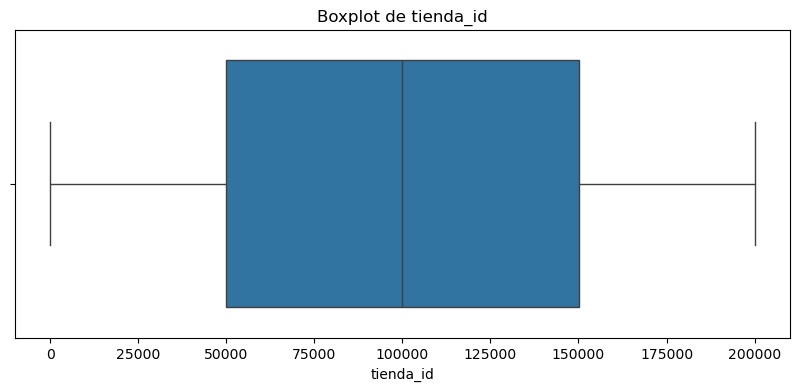

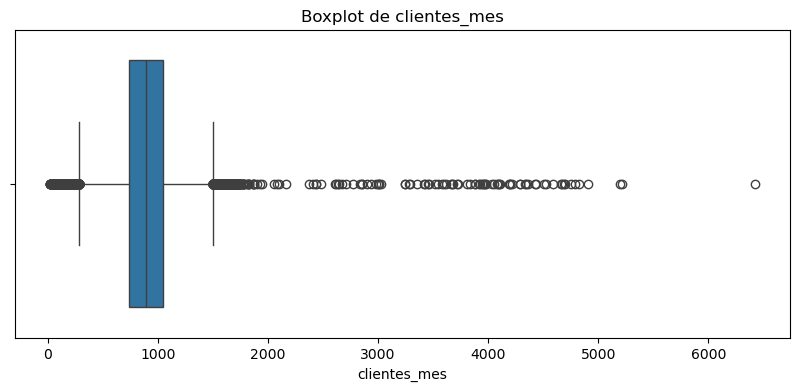

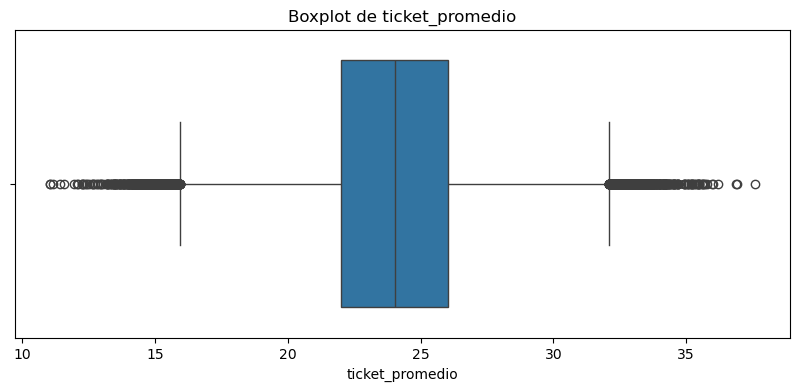

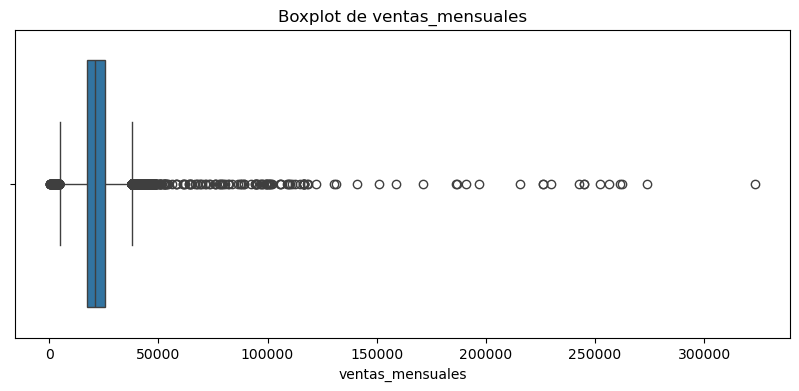

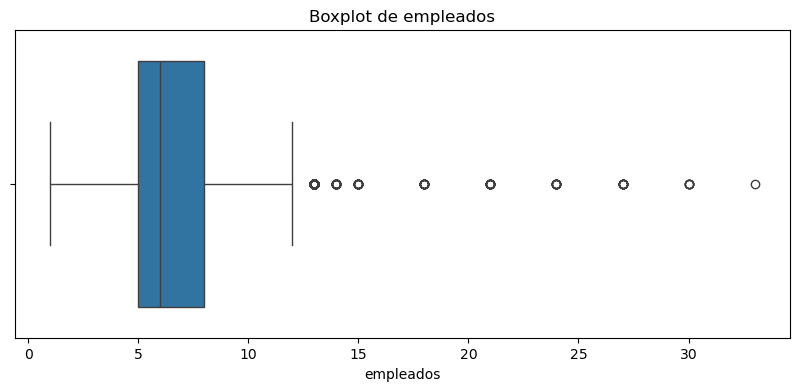

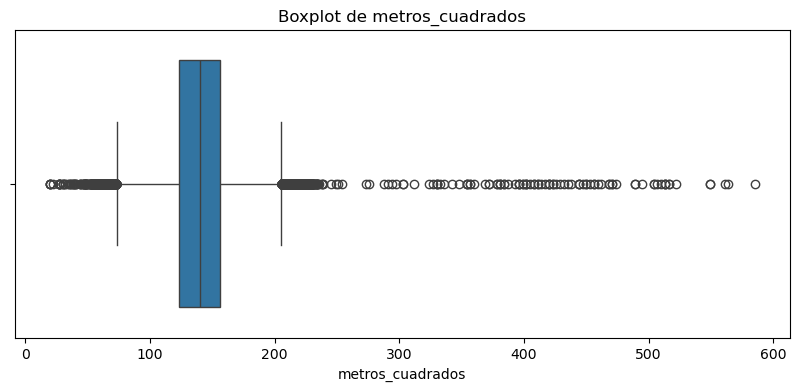

In [11]:
for column in df1_raw.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[column])
    plt.title(f"Boxplot de {column}", fontsize=12)
    plt.xlabel(column)
    plt.show()

In [12]:
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(round(IQR, 2))
print(round(lower,2))
print(round(upper,2))

outliers = y_train[
    (y_train < lower) |
    (y_train > upper)
]

print("Cantidad de outliers:", len(outliers))


8250.67
4715.82
37718.49
Cantidad de outliers: 1568


In [13]:
# cálculo vectorizado del z-score
z_scores = (y_train - y_train.mean()) / y_train.std()
print('Outliers por z-score',len(z_scores>3))

Outliers por z-score 159602


In [14]:

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(x_train)
outliers = iso_forest.predict(x_train) 
es_outlier=outliers==-1

print(f"Número de outliers detectados: {sum(es_outlier)}")

x_train_clean = x_train[~es_outlier]
y_train_clean = y_train[~es_outlier]

print(f"Registros antes: {len(x_train)}")
print(f"Registros después: {len(x_train_clean)}")

""" for col in x_train_clean.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

Número de outliers detectados: 7981
Registros antes: 159602
Registros después: 151621


' for col in x_train_clean.columns:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_raw[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

In [15]:
x_train_clean = x_train[(y_train >= lower) & (y_train <= upper)].copy()
y_train_clean = y_train[(y_train >= lower) & (y_train <= upper)].copy()

print('Antes (entrenamiento):', len(x_train))
print('Después (entrenamiento):', len(x_train_clean))

""" for col in x_train_clean.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_raw[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

Antes (entrenamiento): 159602
Después (entrenamiento): 158034


' for col in x_train_clean.columns:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_raw[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

### Mi versión del ejercicio sin train y test

### IQR

In [16]:
num_cols=df1_raw.select_dtypes('number').columns

Q1= df1_raw[num_cols].quantile(0.25)
Q3=df1_raw[num_cols].quantile(0.75)
IQR=Q3-Q1
print(IQR)

upper= Q3+1.5*IQR
lower= Q1-1.5*IQR

df1_clean = df1_raw[((df1_raw[num_cols] >= lower) & (df1_raw[num_cols] <= upper)).all(axis=1)]
print(f"Registros originales: {len(df1_raw)}")
print(f"Registros tras limpiar todos los outliers: {len(df1_clean)}")

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """

tienda_id           100031.000
clientes_mes           303.000
ticket_promedio          4.040
ventas_mensuales      8251.455
empleados                3.000
metros_cuadrados        33.000
dtype: float64
Registros originales: 199503
Registros tras limpiar todos los outliers: 194057


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

### Z-SCORE

In [17]:
media=df1_raw[num_cols].mean()
std=df1_raw[num_cols].std()
print(media)
print(std)

ZSCORE=(df1_raw[num_cols]-media)/std
#print(ZSCORE)

print('outliers:', ZSCORE[(ZSCORE>3) | (ZSCORE<-3)].count())

filas_outliers = (ZSCORE.abs() > 3).any(axis=1)

df1_clean=df1_raw[~filas_outliers].copy()
print(f'filas antes: {len(df1_raw)}')
print(f'filas después: {len(df1_clean)}')

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """



tienda_id           99992.381172
clientes_mes          892.380821
ticket_promedio        24.009313
ventas_mensuales    21440.002838
empleados               6.483692
metros_cuadrados      139.687208
dtype: float64
tienda_id           57742.844609
clientes_mes          233.663192
ticket_promedio         2.998083
ventas_mensuales     6686.124252
empleados               1.992440
metros_cuadrados       25.746453
dtype: float64
outliers: tienda_id             0
clientes_mes        470
ticket_promedio     536
ventas_mensuales    530
empleados           288
metros_cuadrados    490
dtype: int64
filas antes: 199503
filas después: 197683


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

In [18]:
iso_forest=IsolationForest(contamination=0.1, random_state=42)
preds=iso_forest.fit_predict(df1_raw[num_cols])

mask_normales=(preds==1)
df1_clean=df1_raw[mask_normales].copy()
print(f'filas antes: {len(df1_raw)}')
print(f'filas después: {len(df1_clean)}')

""" for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=df1_clean[col])
    plt.title(f"Boxplot de {col}", fontsize=12)
    plt.xlabel(col)
    plt.show() """


filas antes: 199503
filas después: 179552


' for col in num_cols:\n    plt.figure(figsize=(10,4))\n    sns.boxplot(x=df1_clean[col])\n    plt.title(f"Boxplot de {col}", fontsize=12)\n    plt.xlabel(col)\n    plt.show() '

df1_IQR=df1_copy()

# ACT2 CONVERSIÓN DE TIPOS

## Importado

In [20]:
df2=pd.read_csv('social_services_incidents_raw.csv')
df2_raw=df2.copy()
df2_raw.shape

(200000, 10)

In [21]:
df2_raw.head()

,incident_id,incident_datetime,city,service_type,risk_level,people_affected,response_time_minutes,cost_estimated,incident_description,reported_by
0,1,2019-01-01 00:00:00,Leeds,Housing Support,Low,2.0,unknown,481.59,Routine social support follow-up,NGO
1,2,2019-01-01 00:15:46.516732583,Bristol,Mental Health,Low,1.0,79.97,342.83,Low risk assistance request,School
2,3,2019-01-01,LONDON,Social Services,Medium,6.0,34.55,1784.11,Ongoing support intervention,School
3,4,2019-01-01 00:47:19.550197750,Manchester,Emergency,low,2.0,65.86,522.94,Low risk assistance request,School
4,5,2019-01-01 01:03:06.066930334,Manchester,Housing Support,Low,2.0,68.44,865.27 €,NaN,Citizen


In [25]:
df2_raw.info()
df2_raw.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   incident_id            200000 non-null  int64  
 1   incident_datetime      200000 non-null  object 
 2   city                   200000 non-null  object 
 3   service_type           200000 non-null  object 
 4   risk_level             200000 non-null  object 
 5   people_affected        183757 non-null  float64
 6   response_time_minutes  200000 non-null  object 
 7   cost_estimated         200000 non-null  object 
 8   incident_description   180131 non-null  object 
 9   reported_by            200000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 15.3+ MB


incident_id                int64
incident_datetime         object
city                      object
service_type              object
risk_level                object
people_affected          float64
response_time_minutes     object
cost_estimated            object
incident_description      object
reported_by               object
dtype: object

In [26]:
df2_raw.describe()

,incident_id,people_affected
count,200000.000000,183757.000000
mean,100000.500000,4.809346
std,57735.171256,3.546969
min,1.000000,1.000000
25%,50000.750000,2.000000
50%,100000.500000,3.000000
75%,150000.250000,7.000000
max,200000.000000,14.000000


## Limpieza de datos

In [29]:
cat_cols=df2_raw.select_dtypes(include="O").columns
num_cols=df2_raw.select_dtypes(include="number").columns

In [31]:
#df2_raw[cat_cols] = df2_raw[cat_cols].astype(str).str.strip().str.title()

for col in cat_cols:
    df2_raw[col] = df2_raw[col].astype(str).str.strip().str.title()
print(df2_raw.head())

   incident_id              incident_datetime        city     service_type  \
0            1            2019-01-01 00:00:00       Leeds  Housing Support   
1            2  2019-01-01 00:15:46.516732583     Bristol    Mental Health   
2            3                     2019-01-01      London  Social Services   
3            4  2019-01-01 00:47:19.550197750  Manchester        Emergency   
4            5  2019-01-01 01:03:06.066930334  Manchester  Housing Support   

  risk_level  people_affected response_time_minutes cost_estimated  \
0        Low              2.0               Unknown         481.59   
1        Low              1.0                 79.97         342.83   
2     Medium              6.0                 34.55        1784.11   
3        Low              2.0                 65.86         522.94   
4        Low              2.0                 68.44       865.27 €   

               incident_description reported_by  
0  Routine Social Support Follow-Up         Ngo  
1       Lo